#                                     The Sparks Foundation

# Data Science and Business Analytics - GRIP JULY 21

## Author : Abhinaya Anbarasan 

## Task - 3 Exploratory Data Analysis - Retail

### Purpose:

● To perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


● As a business manager, to observe and find out the weak areas where more profit can be made

● To look out for business problems that can derived by exploring the data

### Importing necessary libraries

In [48]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [49]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

LINK TO DOWNLOAD DATASET : https://bit.ly/3i4rbWl

### Reading Dataset 

In [50]:
df = pd.read_csv('SampleSuperstore.csv')

In [51]:
df.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


### Deducing primary information

In [52]:
df.shape

(9994, 13)

 * The dataset has 9994 records
13 columns

In [53]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [54]:
df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [55]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Verifying Data type

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


 * We can conclude that all the Dtypes are appropriate. Hence no changes are being made at this step

### Checking for null and unique values

In [57]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

* There are no null values

In [58]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Checking for duplicate values and dropping them

In [59]:
df.duplicated().sum()

17

In [60]:
df[df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [61]:
df.drop_duplicates(keep= 'first', inplace= True)

In [62]:
df.shape

(9977, 13)

- **The modified data has 9977 records and 13 columns**

### Identifying numerical and categorical columns

In [63]:
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])

In [64]:
numeric.columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [65]:
categorical.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [66]:
numeric.nunique()

Postal Code     631
Sales          5825
Quantity         14
Discount         12
Profit         7287
dtype: int64

In [67]:
categorical.nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

### PAIR PLOT

- **This will help us to understand pairwise relationship**

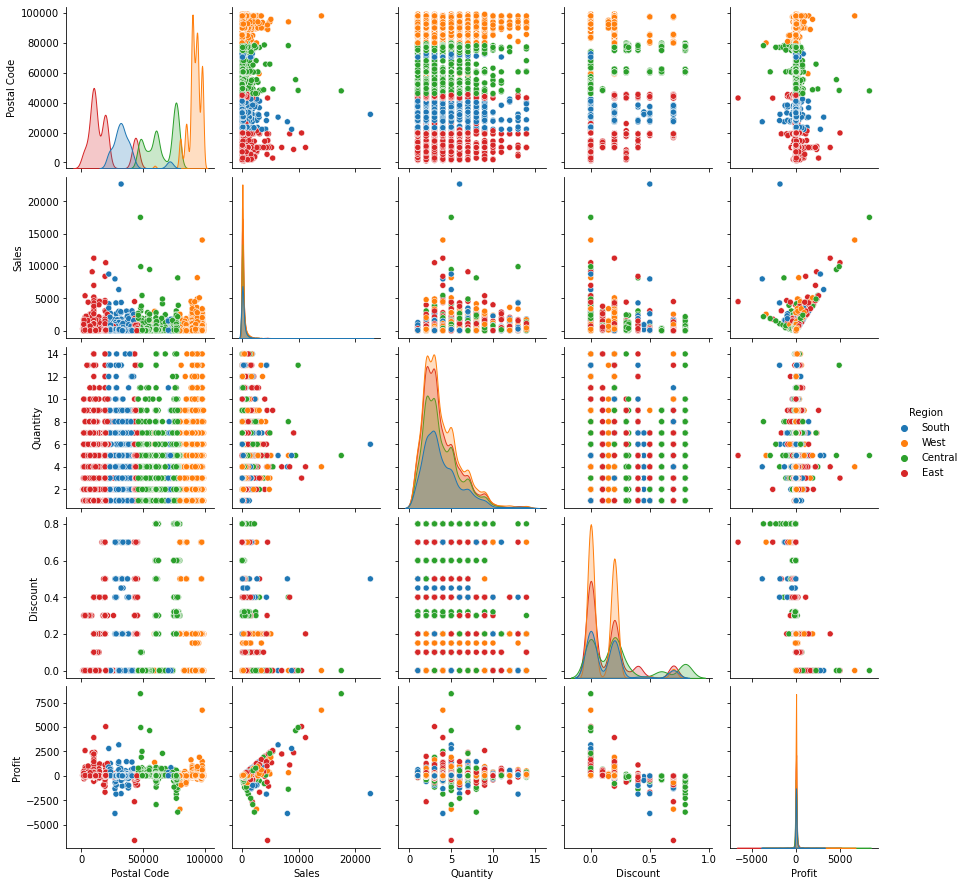

In [68]:
sns.pairplot(df,hue='Region');

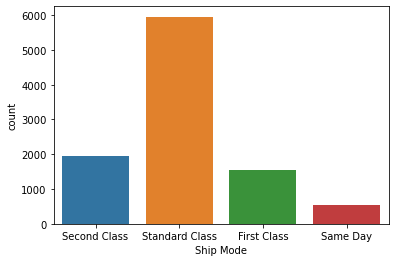

In [69]:
sns.countplot(data = df,x = 'Ship Mode');

 - **Standard class is the most preferred shipment mode**

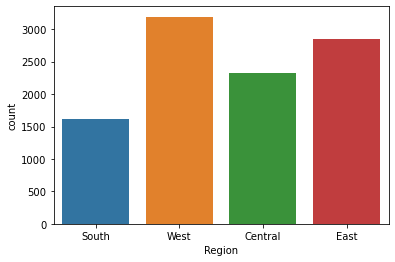

In [70]:
sns.countplot(df['Region']);

- **High activity can be found in West region**

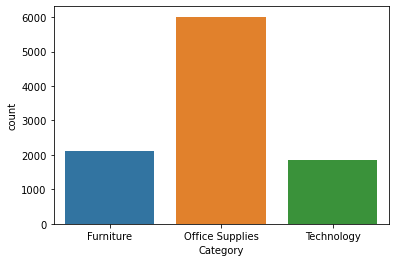

In [71]:
sns.countplot(df['Category']);

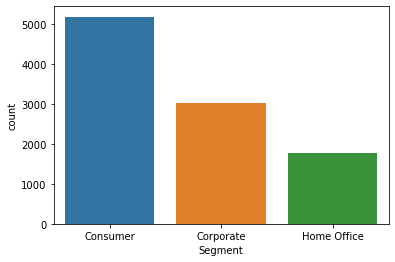

In [72]:
sns.countplot(df['Segment']);

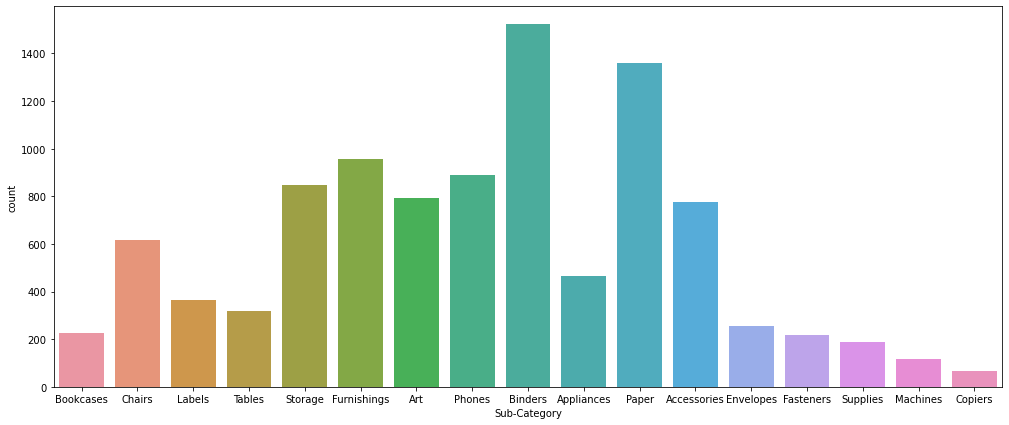

In [73]:
plt.figure(figsize= (17,7))
sns.countplot(df['Sub-Category']);

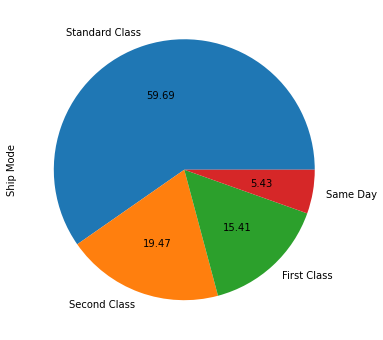

In [74]:
plt.figure(figsize=(10,6))
df['Ship Mode'].value_counts().plot(kind = 'pie',autopct='%1.2f');

In [75]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### TOP 10 STATES THAT CONTRIBUTED TO SALES 

In [76]:
sales_10 = df.groupby('State')['Sales'].sum().nlargest(10)
sales_10

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64

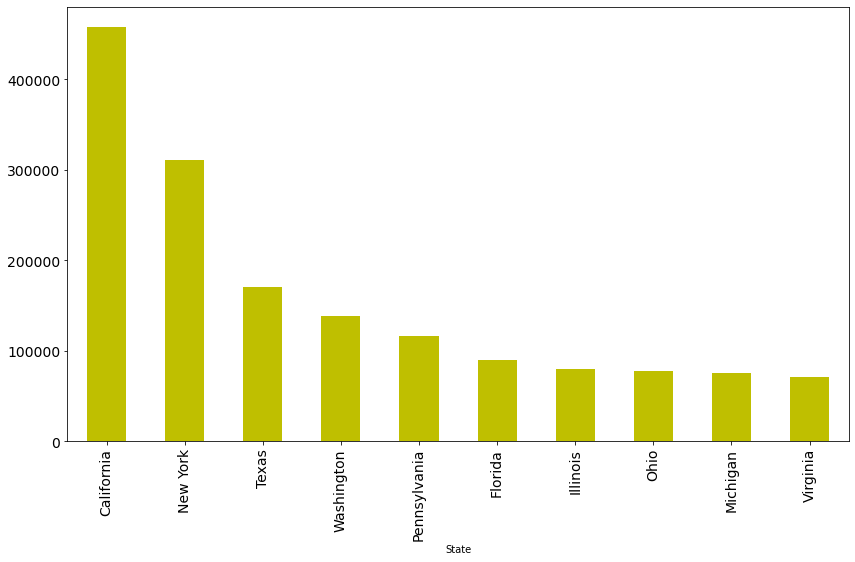

In [77]:
sales_10.plot(kind = 'bar',figsize =(14,8), fontsize =14,color = 'y');

- **CALIFORNIA HAS THE HIGHEST SALES**

### TOP 10 STATES THAT CONTRIBUTED TO PROFIT

In [78]:
profit_10 = df.groupby('State')['Profit'].sum().nlargest(10)
profit_10

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

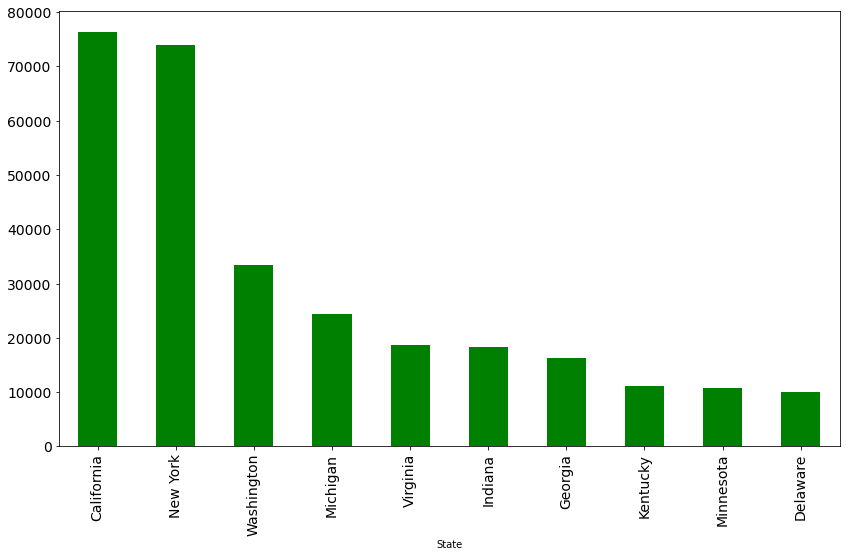

In [79]:
profit_10.plot(kind = 'bar',figsize = (14,8),fontsize = 14, color = 'g');


- **CALIFORNIA RECORDED HIGHEST PROFIT**

### 5 STATES THAT HAD LEAST SALES

In [80]:
df.groupby('State')['Sales'].sum().nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

### 5 STATES THAT RECORDED HIGHEST LOSS

In [81]:
loss_5 = df.groupby('State')['Profit'].sum().nsmallest(5)
loss_5

State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Name: Profit, dtype: float64

### DATA CORRELATION 

In [84]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


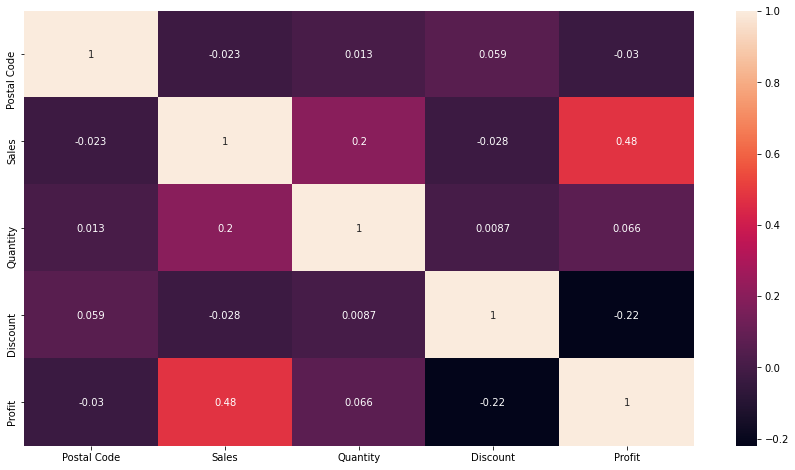

In [88]:
plt.figure(figsize= (15,8))
sns.heatmap(df.corr(),annot = True);

- **PROFIT AND SALES ARE POSITIVELY CORRELATED** 

- **DISCOUNT AND PROFIT ARE NEGATIVELY CORRELATED**

### PROFIT AND SALES DISTRIBUTION ALONG SUBCATEGORIES

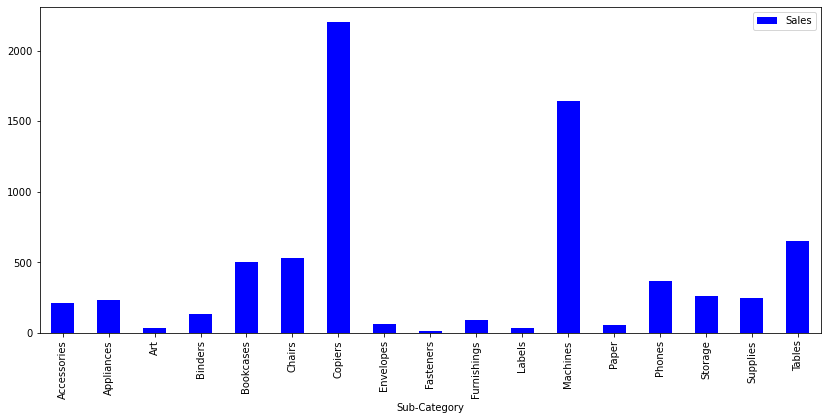

In [107]:
pivot=pd.pivot_table(df,index='Sub-Category',values='Sales')
pivot.plot(kind='bar',figsize = (14,6),color = 'b');

- **COPIERS HAD THE HIGHEST SALES FOLLOWED BY MACHINES**

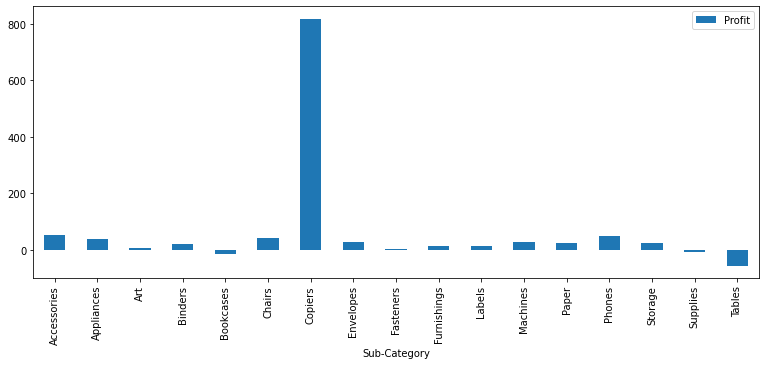

In [111]:
pivot=pd.pivot_table(df,index='Sub-Category',values='Profit')
pivot.plot(kind='bar',figsize = (13,5));

- **COPIERS HAD THE HIGHEST PROFIT**

### PROFIT AND SALES ALONG CATEGORIES

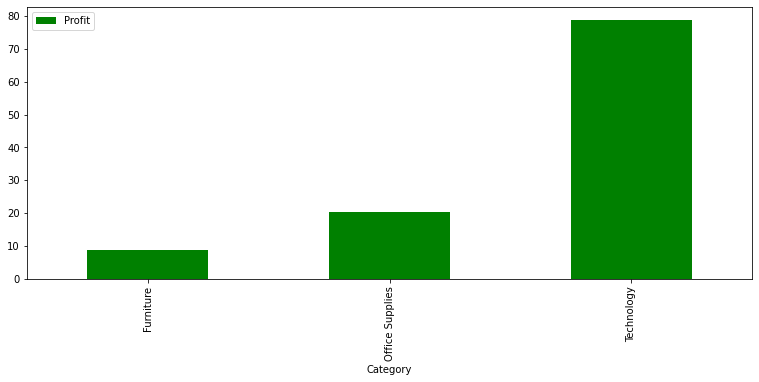

In [125]:
pivot=pd.pivot_table(df,index='Category',values='Profit')
pivot.plot(kind='bar',figsize = (13,5),color = 'g');

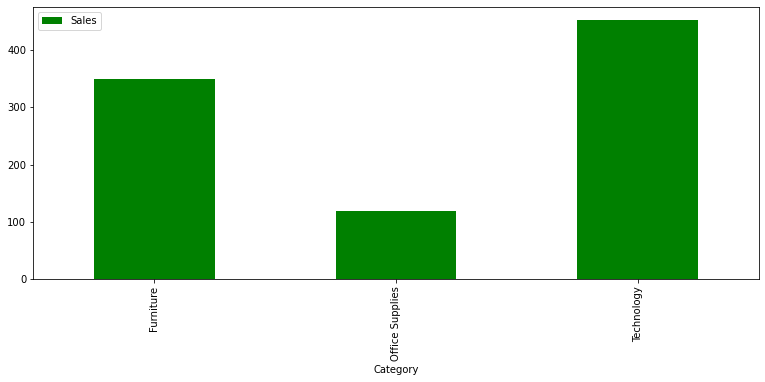

In [126]:
pivot=pd.pivot_table(df,index='Category',values='Sales')
pivot.plot(kind='bar',figsize = (13,5),color = 'g');

- **TECHNOLOGY HAD THE HIGHEST PROFIT FOLLOWED BY OFFICE SUPPLIES**
- **TECHNOLOGY HAD THE HIGHEST SALES FOLLOWED BY FURNITURE**

### ANALYSING DISCOUNT

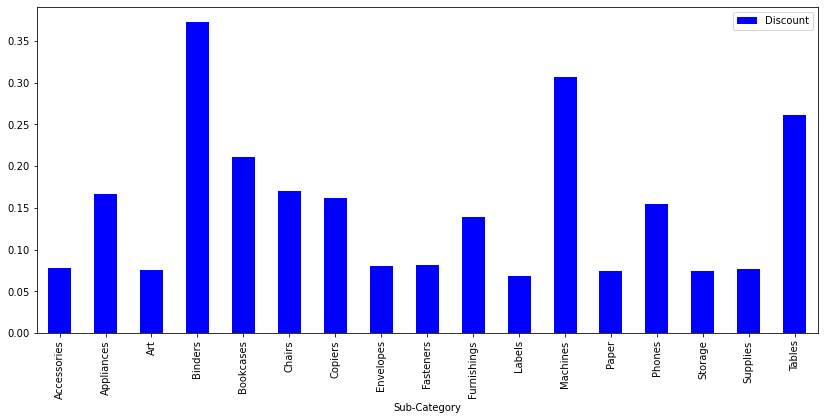

In [128]:
pivot=pd.pivot_table(df,index='Sub-Category',values='Discount')
pivot.plot(kind='bar',figsize = (14,6),color = 'b');

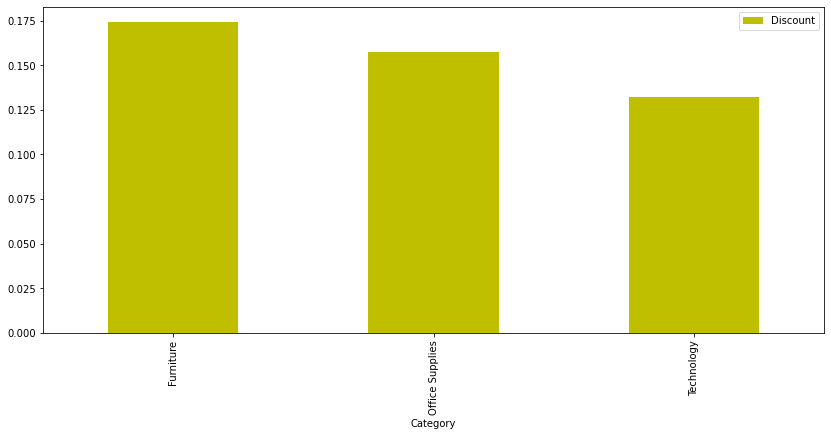

In [130]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
pivot.plot(kind='bar',figsize = (14,6),color = 'y');

- **BLINDERS AND FURNITURE HAD THE HIGHEST DISCOUNT**

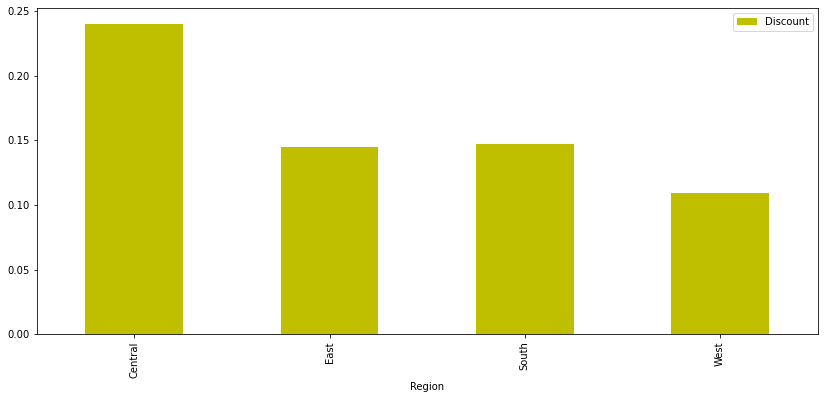

In [166]:
pivot=pd.pivot_table(df,index='Region',values='Discount')
pivot.plot(kind='bar',figsize = (14,6),color = 'y');

- It can be seen that Central provides highest discount

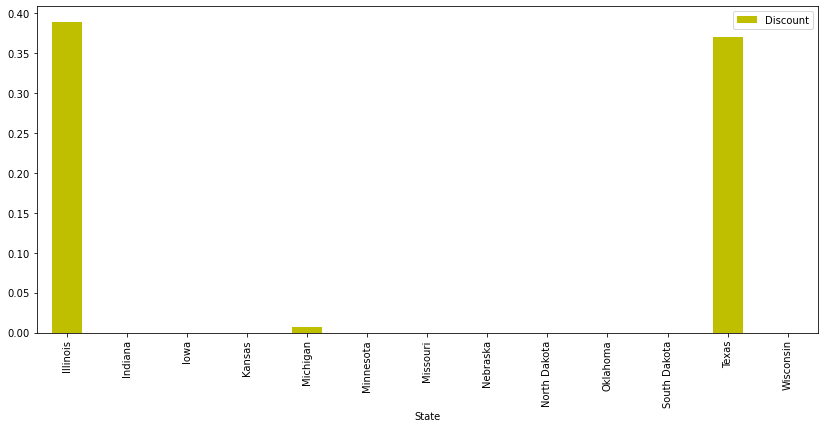

In [170]:
dis = df[df['Region']== 'Central']
pivot=pd.pivot_table(dis,index='State',values='Discount')
pivot.plot(kind='bar',figsize = (14,6),color = 'y');

- Especially Illinois and Texas are the major contributors to discount 

### PROFIT AND SALES ALONG REGION

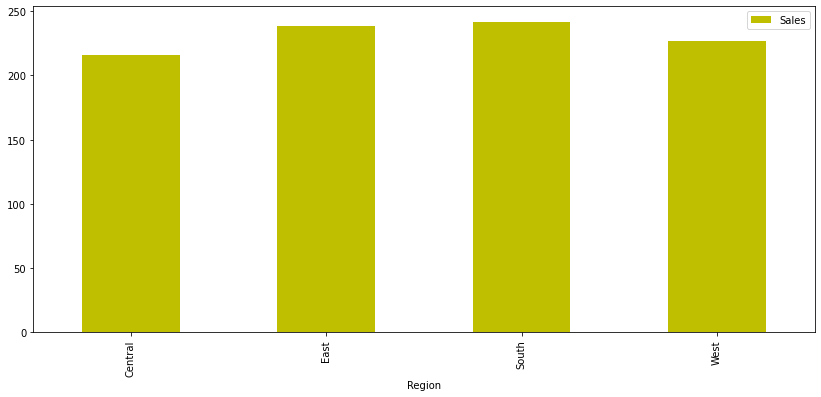

In [131]:
pivot=pd.pivot_table(df,index='Region',values='Sales')
pivot.plot(kind='bar',figsize = (14,6),color = 'y');

- **SOUTH RECORDED THE HIGHEST SALES**

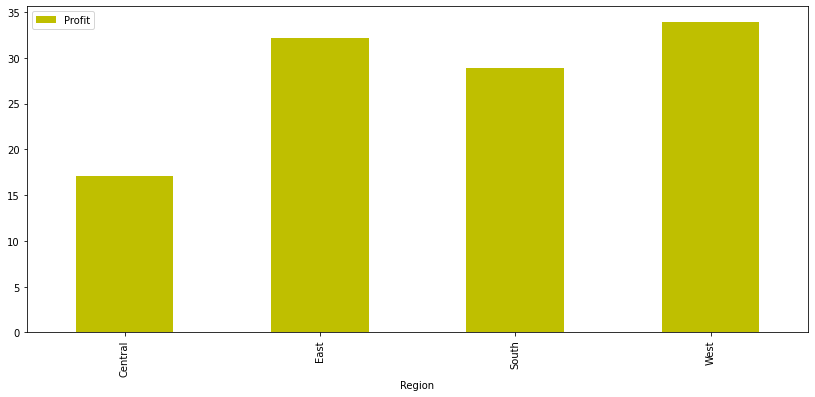

In [132]:
pivot=pd.pivot_table(df,index='Region',values='Profit')
pivot.plot(kind='bar',figsize = (14,6),color = 'y');

- **WEST RECORDED THE HIGHEST PROFIT**

### PROFIT vs SALES WHEN DISCOUNT = 0  

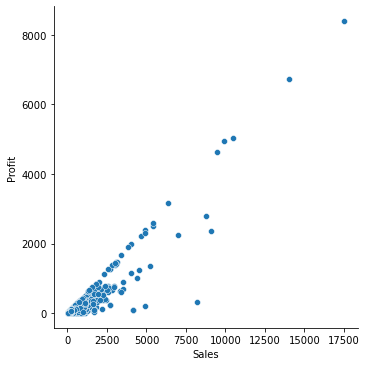

In [137]:
df2=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=df2);

#### INFERENCES 

- From the above plots, we can conclude that copiers had highest sale and Machines had second highest sales.'Machines' had second highest sale but due to high discount it is in loss.

- We also see that sales in 'Fasteners','labels'and 'Art' category are poor.So we need to focus on these sub-categories.
- Discounts can be seen as a major cause of loss.

### ANALYSING SALES WITH RESPECT TO SHIPMENT MODE

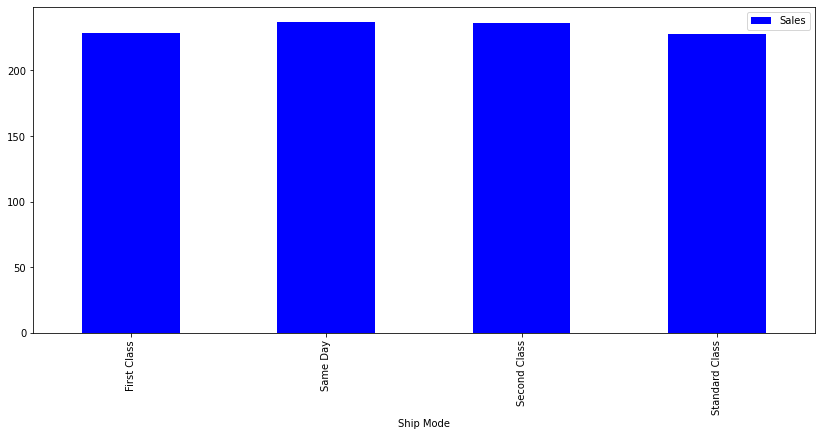

In [154]:
pt = pd.pivot_table(df, index = 'Ship Mode', values = 'Sales')
pt.plot(kind = 'bar', figsize= (14,6), color = 'b');

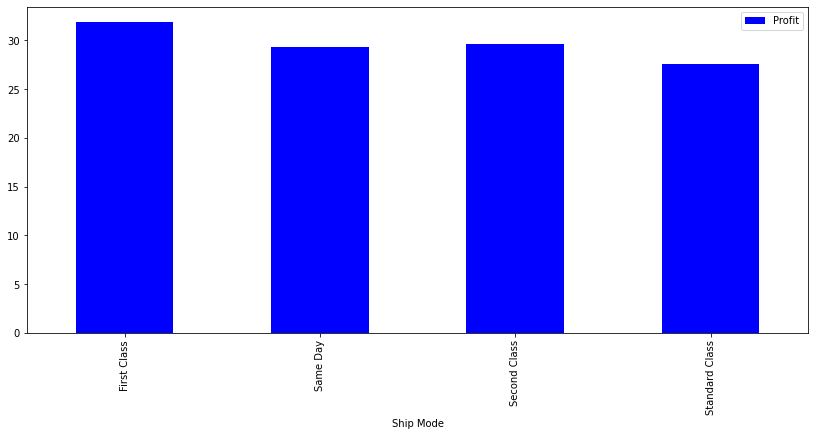

In [155]:
pt = pd.pivot_table(df, index = 'Ship Mode', values = 'Profit')
pt.plot(kind = 'bar', figsize= (14,6), color = 'b');

- We can conclude that First class recorded highest profit while having comparatively less sales

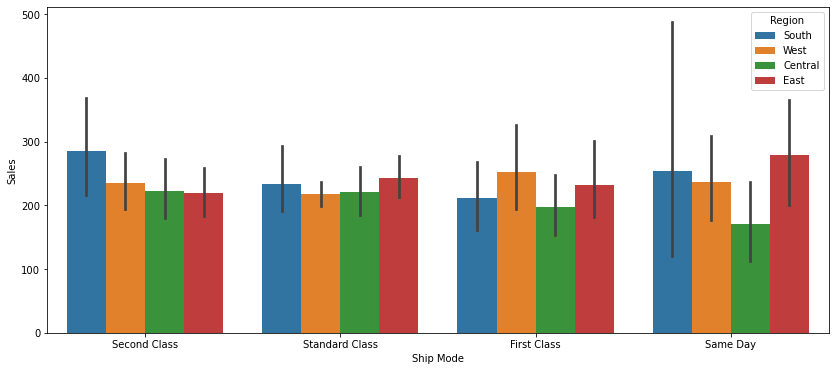

In [160]:
plt.figure(figsize = (14,6))
sns.barplot(x="Ship Mode", y="Sales", hue="Region", data=df);

- South prefers second class shipment while west prefers first class.
- Central prefers second and standard class shipment.
- East prefers same day shipment

### PROFIT AND SALES ACROSS SEGMENTS 

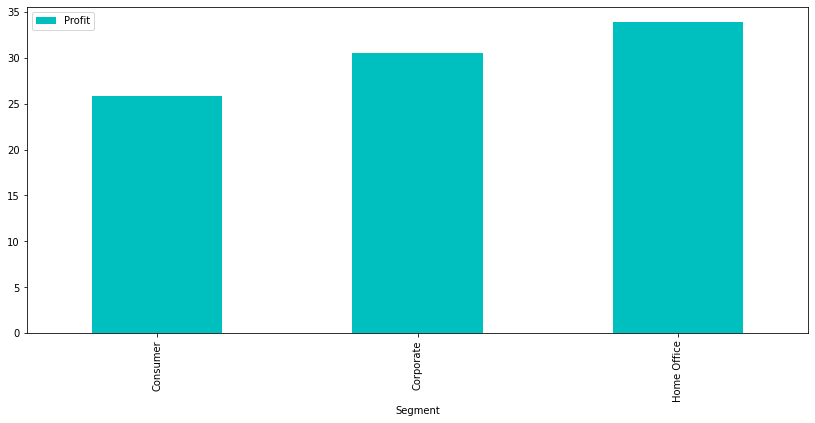

In [165]:
pt = pd.pivot_table(df, index = 'Segment', values = 'Profit')
pt.plot(kind = 'bar', figsize= (14,6), color = 'c');

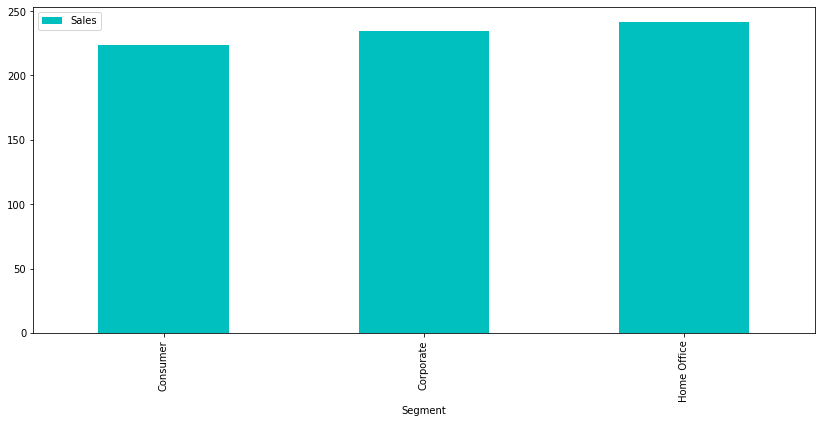

In [164]:
pt = pd.pivot_table(df, index = 'Segment', values = 'Sales')
pt.plot(kind = 'bar', figsize= (14,6), color = 'c');

- HOME OFFICE RECORDED HIGHEST SALES AND PROFIT

### CONCLUSION 

- **Discounts should be reduced and sales should be increased to get better profit.**


- **We also need to focus more on Office Supplies business as sales of this category is very less in comparison with the other two.**


- **'Fasteners','labels'and 'Art' category are performing poorly.Hence more focus should be given to these sub-categories.**


- **Discounts are not improving sales while being major cause for loss.**


- **North Dakota and West Virginia has recorded lowest sales hence need more attention**